In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Asset:
    def __init__(self, ini_p: float, unit: int) -> None:
        self.ini_p = ini_p # the initial price of the asset
        self.unit = unit   # the unit of the asset
    
    def profit(self, cur_p: np.array) -> np.array:
        return (cur_p - self.ini_p) * self.unit


In [4]:
class Call:
    def __init__(self, str_p: float, opt_p: float, unit: int) -> None:
        self.str_p = str_p # strike price
        self.opt_p = opt_p # option price
        self.unit = unit # option unit
    
    def profit(self, cur_p: np.array) -> np.array:
        return (np.maximum(cur_p - self.str_p, 0) - self.opt_p) * self.unit

In [5]:
class Put:
    def __init__(self, str_p: float, opt_p: float, unit: int) -> None:
        self.str_p = str_p # strike price
        self.opt_p = opt_p # option price
        self.unit = unit # option unit
    
    def profit(self, cur_p: np.array) -> np.array:
        return (np.maximum(- cur_p + self.str_p, 0) - self.opt_p) * self.unit

In [6]:
Ast_1 = Asset(100, 0)
Put_1 = Put(105,2,1)
Call_1 = Call(105,2,1)

In [7]:
cur_p = np.linspace(80,120,41)
Ast_1_profit = Ast_1.profit(cur_p)
Put_1_profit = Put_1.profit(cur_p)
Call_1_profit = Call_1.profit(cur_p)
port = Ast_1_profit + Call_1_profit + Put_1_profit

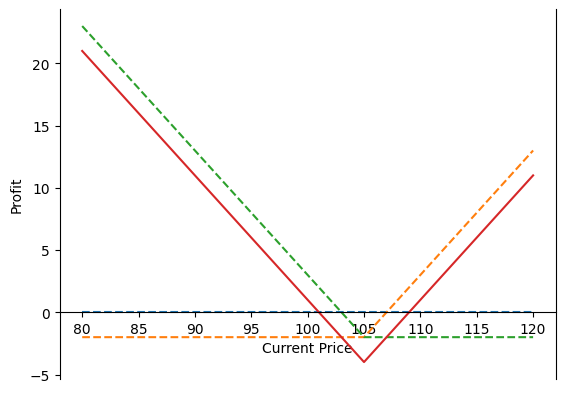

In [8]:
fig, ax = plt.subplots()
ax.plot(cur_p, Ast_1_profit, linestyle='--')
ax.plot(cur_p, Call_1_profit, linestyle='--')
ax.plot(cur_p, Put_1_profit, linestyle='--')
ax.plot(cur_p, port)
ax.set_xlabel('Current Price')
ax.set_ylabel('Profit')
ax.spines['bottom'].set_position(('data', 0))  # 将底部脊柱（横轴）移动到y=0
ax.spines['top'].set_color('none')             # 隐藏顶部脊柱
plt.show()